<a href="https://colab.research.google.com/github/vestinabert/Image_Quality_Assessment/blob/main/Image_Quality_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt

In [5]:
dataset_path = "/content/drive/My Drive/images_dataset/distorted_images"

In [7]:
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.bmp', '.BMP'))]

print(f"Found {len(image_files)} images")

Found 3000 images


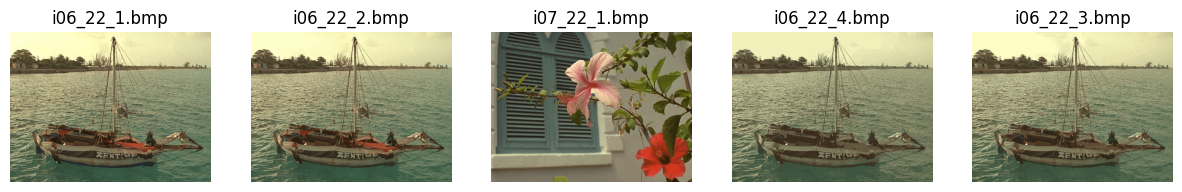

In [9]:
# Displaying first five images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_name in enumerate(image_files[:5]):
    img_path = os.path.join(dataset_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(img_name)

plt.show()